## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from graphviz import Source
import warnings
warnings.filterwarnings('ignore')

# Wine

In [2]:
wine = datasets.load_wine()
wine_df = pd.DataFrame(np.concatenate((wine.data, wine.target.reshape(-1, 1)), axis=1), columns=wine.feature_names+['Target'])
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [3]:
#train_test_split and feature scaling
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=0)
ss_scaler = StandardScaler()
ss_scaler.fit(x_train)
x_train_ss = ss_scaler.transform(x_train)
x_test_ss = ss_scaler.transform(x_test)

In [4]:
# for tree
tree_clf = DecisionTreeClassifier(random_state=123)
cv_result = cross_val_score(tree_clf, x_train, y_train, cv=5)
tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_test)
print('train_accuracy:', np.mean(cv_result))
print('test_accuracy:', np.mean(y_pred == y_test))
print('feature_importance:\n', pd.Series({f:im  for f, im in zip(wine.feature_names, tree_clf.feature_importances_)}).sort_values())
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns=wine.target_names, index=wine.target_names)
confusion_matrix

train_accuracy: 0.8943019943019943
test_accuracy: 0.9333333333333333
feature_importance:
 alcalinity_of_ash               0.000000
alcohol                         0.000000
hue                             0.000000
magnesium                       0.000000
nonflavanoid_phenols            0.000000
od280/od315_of_diluted_wines    0.000000
proanthocyanins                 0.000000
total_phenols                   0.000000
malic_acid                      0.018881
ash                             0.022165
proline                         0.123378
color_intensity                 0.403156
flavanoids                      0.432419
dtype: float64


,class_0,class_1,class_2
class_0,14,2,0
class_1,0,20,1
class_2,0,0,8


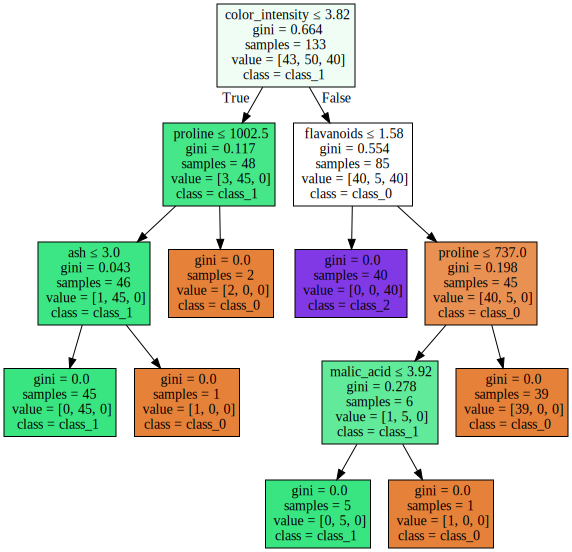

In [5]:
graph = Source(export_graphviz(tree_clf, feature_names=wine.feature_names, class_names=wine.target_names,
                               filled=True, special_characters=True))
graph

In [6]:
# Grid Search
param_grid = [{'min_samples_leaf':[i for i in range(1, 7)],
              'max_depth':[i for i in range(2, 5)]}]
cv_tree = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, scoring='accuracy', 
                       iid=False, cv =5, return_train_score=True)
cv_tree.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid=False, n_jobs=None,
       param_grid=[{'min_samples_leaf': [1, 2, 3, 4, 5, 6], 'max_depth': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [9]:
sorted(cv_tree.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_max_depth',
 'param_min_samples_leaf',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [8]:
cv_tree_result = pd.DataFrame(cv_tree.cv_results_)
select_col = ['mean_test_score',
              'std_test_score',
              'mean_train_score',
              'std_train_score',
              'param_max_depth',
              'param_min_samples_leaf']
cv_tree_result[select_col]

,mean_test_score,std_test_score,mean_train_score,std_train_score,param_max_depth,param_min_samples_leaf
0,0.872080,0.060439,0.949233,0.004768,2,1
1,0.872080,0.060439,0.947364,0.004649,2,2
2,0.872080,0.060439,0.943590,0.010417,2,3
3,0.872080,0.060439,0.941703,0.009375,2,4
4,0.849858,0.099093,0.939817,0.009785,2,5
5,0.849858,0.099093,0.939817,0.009785,2,6
6,0.894017,0.051650,0.994357,0.004607,3,1
7,0.901994,0.062036,0.986810,0.009628,3,2
8,0.901994,0.062036,0.986810,0.012802,3,3
9,0.886610,0.054435,0.973638,0.020141,3,4


In [7]:
cv_tree.best_params_, cv_tree.best_index_, cv_tree.best_score_, cv_tree.best_estimator_

({'max_depth': 3, 'min_samples_leaf': 2},
 7,
 0.9019943019943021,
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=0,
             splitter='best'))

In [10]:
#check feature importance by tree
pd.Series({f:i for f, i in zip(wine.feature_names, cv_tree.best_estimator_.feature_importances_)}).sort_values(ascending=False)

flavanoids                      0.445890
color_intensity                 0.415715
proline                         0.127222
ash                             0.011174
total_phenols                   0.000000
proanthocyanins                 0.000000
od280/od315_of_diluted_wines    0.000000
nonflavanoid_phenols            0.000000
malic_acid                      0.000000
magnesium                       0.000000
hue                             0.000000
alcohol                         0.000000
alcalinity_of_ash               0.000000
dtype: float64

In [11]:
np.mean(cv_tree.best_estimator_.predict(x_test) == y_test)

0.9111111111111111

In [12]:
pd.DataFrame(metrics.confusion_matrix(y_test, cv_tree.best_estimator_.predict(x_test)), columns=wine.target_names, index=wine.target_names)

,class_0,class_1,class_2
class_0,14,2,0
class_1,1,19,1
class_2,0,0,8


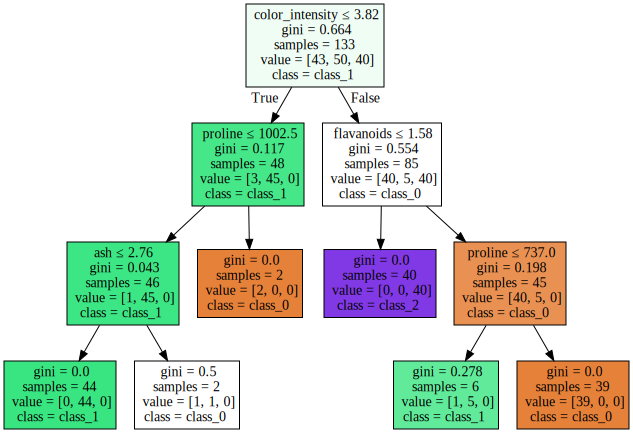

In [13]:
cv_tree_graph = Source(export_graphviz(cv_tree.best_estimator_, filled=True, feature_names=wine.feature_names,
                class_names=wine.target_names, special_characters=True))
cv_tree_graph

In [14]:
# Logistic Regression
LR_clf = LogisticRegression()
LR_cv_result = cross_val_score(LR_clf, x_train_ss, y_train, scoring='accuracy', cv=5)
print('LR_cv_result:', LR_cv_result.mean(), LR_cv_result)
LR_clf.fit(x_train_ss, y_train)
y_pred = LR_clf.predict(x_test_ss)
print('test_accuracy:', np.mean(y_pred == y_test), metrics.accuracy_score(y_test, y_pred))
print('clf_coef:', LR_clf.coef_)
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns=wine.target_names, index=wine.target_names)

LR_cv_result: 0.97008547008547 [0.92592593 1.         0.96296296 1.         0.96153846]
test_accuracy: 1.0 1.0
clf_coef: [[ 1.17874738  0.38986342  0.72132405 -1.32541174  0.02850673  0.20395682
   1.11049512 -0.04857286 -0.19619218  0.11947213  0.01325545  0.94971393
   1.62467407]
 [-1.27037878 -0.71773692 -1.06446983  0.77603195 -0.12640684  0.06033109
   0.26046561  0.23735616  0.39062372 -1.73263473  0.8845082   0.16355406
  -1.65199473]
 [ 0.31891561  0.41749417  0.37642072  0.2794007   0.1836333  -0.06836741
  -1.27635623 -0.04888193 -0.46931452  1.47713075 -0.91888112 -0.9859909
  -0.0510165 ]]


,class_0,class_1,class_2
class_0,16,0,0
class_1,0,21,0
class_2,0,0,8


In [15]:
#Logistic parameter check
param_grid = [{'penalty':['l1', 'l2'], 'C':[10**i for i in range(-10, 11)]}]
LR_cv_clf = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', iid=False, cv=5, return_train_score=True)
LR_cv_clf.fit(x_train_ss, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [17]:
LR_cv_result = pd.DataFrame(LR_cv_clf.cv_results_)
sorted(LR_cv_clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_C',
 'param_penalty',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [18]:
LR_cv_clf.best_params_, LR_cv_clf.best_index_, LR_cv_clf.best_score_

({'C': 0.1, 'penalty': 'l1'}, 18, 0.9774928774928775)

In [19]:
LR_cv_result[['mean_test_score',
              'mean_train_score',
              'param_C',
              'param_penalty']].sort_values('mean_test_score', ascending=False).head(10)

,mean_test_score,mean_train_score,param_C,param_penalty
18,0.977493,0.979333,0.1,l1
19,0.970370,0.984976,0.1,l2
21,0.970085,0.996244,1,l2
24,0.962678,1.000000,100,l1
23,0.962678,1.000000,10,l2
22,0.962678,1.000000,10,l1
20,0.962678,0.996244,1,l1
15,0.955271,0.949268,0.001,l2
17,0.955271,0.966179,0.01,l2
39,0.954986,1.000000,1000000000,l2


In [20]:
y_pred_LR_cv = LR_cv_clf.best_estimator_.predict(x_test_ss)
print('test_accuracy:', np.mean(y_pred_LR_cv == y_test))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_LR_cv), columns=wine.target_names, index=wine.target_names)

test_accuracy: 0.9777777777777777


,class_0,class_1,class_2
class_0,16,0,0
class_1,0,20,1
class_2,0,0,8


In [21]:
# check best parameter
check_LR_clf = LogisticRegression(penalty='l1', C=0.1)
check_LR_clf.fit(x_train_ss, y_train)
y_pred_c = check_LR_clf.predict(x_test_ss)
print('test_score:', np.mean(y_pred_c == y_test), check_LR_clf.score(x_test_ss, y_test))
print('clf_coef:', check_LR_clf.coef_)
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_c), columns=wine.target_names, index=wine.target_names)

test_score: 0.9777777777777777 0.9777777777777777
clf_coef: [[ 0.34545314  0.          0.         -0.09006306  0.          0.
   0.80167439  0.          0.          0.          0.          0.
   1.15003988]
 [-0.67322265 -0.11163167 -0.03569276  0.          0.          0.
   0.          0.          0.         -0.96255154  0.08711141  0.
  -0.35900519]
 [ 0.          0.06015304  0.          0.          0.          0.
  -0.69197679  0.          0.          0.55207302 -0.39428458 -0.60606058
   0.        ]]


,class_0,class_1,class_2
class_0,16,0,0
class_1,0,20,1
class_2,0,0,8


# Boston

In [22]:
boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['TARGET'] = pd.DataFrame(boston.target)                        
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [24]:
#Train_test_split and feature_scaling
X_train, X_test, Y_train, Y_test = train_test_split(boston_df[boston.feature_names], boston_df.TARGET, test_size=0.3, random_state=0)
ss_scaler.fit(X_train)
X_train_ss = ss_scaler.transform(X_train)
X_test_ss = ss_scaler.transform(X_test)

In [25]:
#Liner_Regrssion
Linear_reg = LinearRegression()
Linear_result = cross_val_score(Linear_reg, X_train_ss, Y_train, scoring='r2', cv=5)
print('train_cv_result:', np.mean(Linear_result), Linear_result)
Linear_reg.fit(X_train_ss, Y_train)
Y_pred_linear = Linear_reg.predict(X_test_ss)
print('test_r2_score:', (1 - np.var(Y_pred_linear - Y_test)/np.var(Y_test)), metrics.r2_score(Y_test, Y_pred_linear, multioutput='raw_values'))

train_cv_result: 0.7183293974315903 [0.7246982  0.58082515 0.77515092 0.72161474 0.78935797]
test_r2_score: 0.6741613564076292 [0.67338255]


In [26]:
#Lasso Regression
Lasso_reg = Lasso(alpha=1.2) #alpha = 0 >> Linear Regression
Lasso_result = cross_val_score(Lasso_reg, X_train_ss, Y_train, scoring='r2', cv=5)
print('train_cv_result:', np.mean(Lasso_result), Lasso_result)
Lasso_reg.fit(X_train_ss, Y_train)
Y_pred_lasso = Lasso_reg.predict(X_test_ss)
print('test_r2_score:', (1 - np.var(Y_pred_lasso - Y_test)/np.var(Y_test)), 
      metrics.r2_score(Y_test, Y_pred_lasso, multioutput='raw_values'))

train_cv_result: 0.6712155180955452 [0.7018838  0.59645336 0.71688776 0.62098699 0.71986568]
test_r2_score: 0.5966212415239729 [0.59644069]


In [27]:
#check feature importance from Lasso
pd.Series({f:np.abs(c) for f, c in zip(boston.feature_names, Lasso_reg.coef_)}).sort_values(ascending=False)

LSTAT      3.373944
RM         2.562775
PTRATIO    1.690217
TAX        0.029054
ZN         0.000000
RAD        0.000000
NOX        0.000000
INDUS      0.000000
DIS        0.000000
CRIM       0.000000
CHAS       0.000000
B          0.000000
AGE        0.000000
dtype: float64

In [28]:
#Ridge Regression
Ridge_reg = Ridge(alpha=0.01) # alpha = 0 >> Linera Regression
Ridge_result = cross_val_score(Ridge_reg, X_train_ss, Y_train, scoring='r2', cv=5)
print('train_cv_result:', np.mean(Ridge_result), Ridge_result)
Ridge_reg.fit(X_train_ss, Y_train)
Y_pred_ridge = Ridge_reg.predict(X_test_ss)
print('test_r2_score:', (1 - np.var(Y_pred_ridge - Y_test)/np.var(Y_test)), 
      metrics.r2_score(Y_test, Y_pred_ridge, multioutput='raw_values'))

train_cv_result: 0.7183391248399983 [0.72472349 0.58083801 0.77515159 0.72160647 0.78937607]
test_r2_score: 0.6741548877593493 [0.67337647]


In [29]:
# Decision Tree >> do not feature scaling 
Tree_reg = DecisionTreeRegressor(max_depth=3 )
Tree_result = cross_val_score(Tree_reg, X_train_ss, Y_train, scoring='r2', cv=5)
print('train_cv_result:', np.mean(Tree_result), Tree_result)
Tree_reg.fit(X_train_ss, Y_train)
Y_pred_tree = Tree_reg.predict(X_test_ss)
print('test_r2_score:', (1 - np.var(Y_pred_tree - Y_test)/np.var(Y_test)), 
      metrics.r2_score(Y_test, Y_pred_tree, multioutput='raw_values'))

train_cv_result: 0.6142745046728588 [0.77733801 0.48140337 0.31378349 0.75549883 0.74334883]
test_r2_score: 0.6631568309250849 [0.66288731]


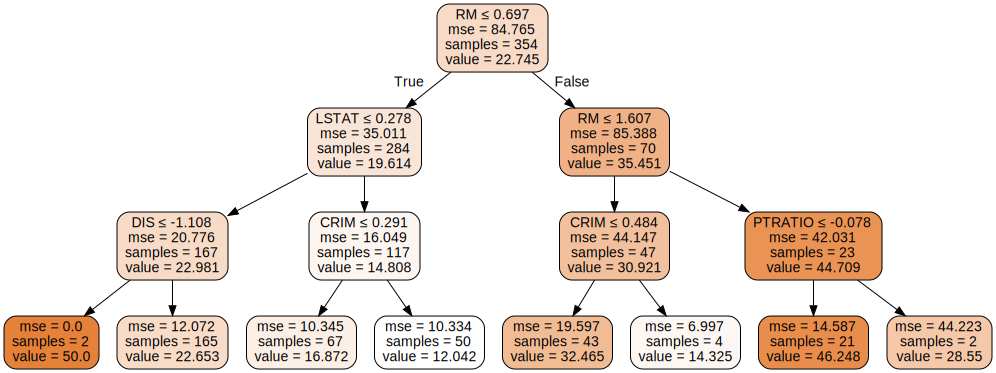

In [30]:
Source(export_graphviz(Tree_reg, filled=True, feature_names=boston.feature_names, 
                       special_characters=True, rounded=True))

In [31]:
# feature importance
important_feature = pd.Series({f:im for f, im in zip(boston.feature_names, Tree_reg.feature_importances_)}).sort_values(ascending=False)
important_feature

RM         0.666492
LSTAT      0.179949
CRIM       0.073302
DIS        0.057862
PTRATIO    0.022394
ZN         0.000000
TAX        0.000000
RAD        0.000000
NOX        0.000000
INDUS      0.000000
CHAS       0.000000
B          0.000000
AGE        0.000000
dtype: float64

In [32]:
list(important_feature.index)[:5]

['RM', 'LSTAT', 'CRIM', 'DIS', 'PTRATIO']

In [33]:
XX_train = X_train[list(important_feature.index)[:5]]
Tree_result2 = cross_val_score(Tree_reg, XX_train, Y_train, scoring='r2', cv=5)
print('cv_train_result:', np.mean(Tree_result2), Tree_result2)

cv_train_result: 0.6142745046728587 [0.77733801 0.48140337 0.31378349 0.75549883 0.74334883]
